## A Practical Introduction to Pandas 

Pandas is one of the main Python packages for dealing with data. It is used widely in Data Science, and provides many tools for the manipulation and investigation of data sets. This tutorial introduces the basic concept of Pandas and applies these to weather data for Melbourne Airport from the Bureau of Meteorology.

## Contents

* Introduction
* Melbourne Weather Data (Combining Pandas and Plotting)
* Exercises

## Introduction

Before applying Pandas to the Melbourne weather data, we will introduce some basic concepts. 

First we import the necessary libraries. The convention for Pandas is to use the abbreviation `pd`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series

Pandas series can be thought of as generalizations of one-dimensional arrays or of dictionaries. In their simplest form they are an array with an explicit numerical index.

To create a series we use the function `pd.Series()` and pass the argument as an array.

In [2]:
data = pd.Series([5, 6, 7, 8])
data

0    5
1    6
2    7
3    8
dtype: int64

The series now has two objects we can view: the values for the series and the corresponding indices.

In [3]:
print('Series values:',data.values)
print('Series indices:',data.index)

Series values: [5 6 7 8]
Series indices: RangeIndex(start=0, stop=4, step=1)


We can now access the data in the same way we would for a `numpy` array, except that we also get information about the indices.

In [4]:
print('Second element of series is:',data[1])
print('Second and third elements of series are:')
print(data[1:3])

Second element of series is: 6
Second and third elements of series are:
1    6
2    7
dtype: int64


The indices for the series are no longer limited to being integers. For example, by specifying the argument `index`, we can make the indices a series of strings.

In [5]:
data = pd.Series([5, 6, 7, 8], index=['alpha','beta','gamma','delta'])
data

alpha    5
beta     6
gamma    7
delta    8
dtype: int64

Now the data can be referred to by our new indices. Notice that using a slice of these indices the last element is included, compared to when we used integer indices and the last element is not included. 

In [6]:
print('Single element:',data['alpha'])
print('Slice of elements:')
print(data['alpha':'gamma'])

Single element: 5
Slice of elements:
alpha    5
beta     6
gamma    7
dtype: int64


The series can now be sorted using the method `s.sort_values()` (here `s` represents the name of the current series). To sort our series in descending order, we can therefore use:

In [7]:
data.sort_values(ascending=False)

delta    8
gamma    7
beta     6
alpha    5
dtype: int64

We also filter the results using a `mask`. For example, if we want all values in the series equal to 6, we use:

In [8]:
data[data == 6]

beta    6
dtype: int64

The mask is itself a series with booleans as values instead of the original values that can be used to subset the orginal series.

In [9]:
data == 6

alpha    False
beta      True
gamma    False
delta    False
dtype: bool

Masks can have multiple criteria, which are separated by an `&` (and) to specify both criteria must be true, or `!` (or) to specify either criteria to be true. Each of these criteria needs to be surrounded by brackets. To find all elements in the series greater than or equal to 5 and less than 7, we can write:

In [10]:
data[(data >= 5) & (data < 7)]

alpha    5
beta     6
dtype: int64

### DataFrames

DataFrames are two-dimensional versions of series, which can have row indices and column names. The columns can be different datatypes, e.g., integers, floats, strings or Boolean. Generally, dataframes are used much more than series, and can be thought of as analogous to an Excel worksheet or database table. 

There are a number of ways to create dataframes, we will just cover two here. The first is to create the dataframe from a sequence of series. Below we define three series corresponding to properties of the states and territories of Australia. Notice that for the last series the indices are ordered differently from the first two series.

In [11]:
area = pd.Series([2523924, 1723030, 1334404, 979651, 801137, 227038, 64519, 2358], 
                 index=['WA', 'QLD', 'NT', 'SA', 'NSW', 'VIC', 'TAS', 'ACT'])
population = pd.Series([2667130, 5184847, 246500, 1770591, 8166369, 6680648, 541071, 431215], 
                 index=['WA', 'QLD', 'NT', 'SA', 'NSW', 'VIC', 'TAS', 'ACT'])
capitals = pd.Series(['Sydney', 'Melbourne', 'Brisbane', 'Adelaide', 'Perth', 'Hobart', 'Darwin', 'Canberra'], 
                 index=['NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'])

We can now create a dataframe using the function `pd.DataFrame()`, and passing the argument as a dictionary for the three series. The key for the dictionary (the first argument for each pair) is then used as the name for the columns of the dataframe. Notice that the dataframe is created so that the index of the entries match, and is then ordered based on the index.

In [12]:
states = pd.DataFrame({'population': population,
                       'area': area,
                       'capitals': capitals})
states

,population,area,capitals
ACT,431215,2358,Canberra
NSW,8166369,801137,Sydney
NT,246500,1334404,Darwin
QLD,5184847,1723030,Brisbane
SA,1770591,979651,Adelaide
TAS,541071,64519,Hobart
VIC,6680648,227038,Melbourne
WA,2667130,2523924,Perth


The datatypes for each column are then stored in the property `df.dtypes` (here `df` refers to the name of the current dataframe). In this case, everything is as expected.

In [13]:
states.dtypes

population     int64
area           int64
capitals      object
dtype: object

We can view other properties of the dataframe, e.g., the column names and the row indices.

In [14]:
print('Column names:',states.columns)
print('Row indices:',states.index)

Column names: Index(['population', 'area', 'capitals'], dtype='object')
Row indices: Index(['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA'], dtype='object')


The other way to create the dataframe is to specify an array or list as the argument. Here we use an `numpy` array as the argument and use the `values` for the series which have already been defined. We could also explicitly define the arrays. The argument `T` at the end of the array is to take the transpose, i.e., swap the rows with the columns. The first problem that we notice is that because the indices for the capitals are different from that of the other two columns, the capitals are incorrectly assigned.

In [15]:
states_alt = pd.DataFrame(np.array([area.values, population.values, capitals.values]).T,
             columns=['area','population','capitals'],
             index=['WA', 'QLD', 'NT', 'SA', 'NSW', 'VIC', 'TAS', 'ACT'])
states_alt

,area,population,capitals
WA,2523924,2667130,Sydney
QLD,1723030,5184847,Melbourne
NT,1334404,246500,Brisbane
SA,979651,1770591,Adelaide
NSW,801137,8166369,Perth
VIC,227038,6680648,Hobart
TAS,64519,541071,Darwin
ACT,2358,431215,Canberra


The second problem is that `numpy` creates an array with all the same data types, and consequently, tries to make everything a string. If we view `df.dtypes` all the columns are `object` (string).

In [16]:
states_alt.dtypes

area          object
population    object
capitals      object
dtype: object

Hence, if you are using an array to create a dataframe, you need to beware of these gotchas. The following cell shows how lists can be used to correctly create the required dataframe.

In [17]:
states_alt = pd.DataFrame([[2523924, 2667130, 'Perth'],
                           [1723030, 5184847, 'Brisbane'],
                           [1334404, 246500,  'Darwin'],
                           [979651,  1770591, 'Adelaide'],
                           [801137, 8166369, 'Sydney'],
                           [227038, 6680648, 'Melbourne'],
                           [64519, 541071, 'Hobart'],
                           [2358, 431215, 'Canberra']],
                          columns=['area','population','capitals'],
                          index=['WA', 'QLD', 'NT', 'SA', 'NSW', 'VIC', 'TAS', 'ACT'])

states_alt

,area,population,capitals
WA,2523924,2667130,Perth
QLD,1723030,5184847,Brisbane
NT,1334404,246500,Darwin
SA,979651,1770591,Adelaide
NSW,801137,8166369,Sydney
VIC,227038,6680648,Melbourne
TAS,64519,541071,Hobart
ACT,2358,431215,Canberra


#### Manipulating Dataframes
As with series, we can sort dataframes based on specific columns, by using the method `df.sort_values()` and specificing the argument `by`. If we want to sort the dataframe by descending population, then we can use:

In [18]:
states.sort_values(by=['population'], ascending=False)

,population,area,capitals
NSW,8166369,801137,Sydney
VIC,6680648,227038,Melbourne
QLD,5184847,1723030,Brisbane
WA,2667130,2523924,Perth
SA,1770591,979651,Adelaide
TAS,541071,64519,Hobart
ACT,431215,2358,Canberra
NT,246500,1334404,Darwin


Operations on the elements of the dataframe are now very easy. For example, if we want to calculate the population density in terms of people per square km, we just need to divide the population column by the area column. This can be assigned to a new column, as shown in the following cell.

In [19]:
states['density'] = states['population']/states['area']
states

,population,area,capitals,density
ACT,431215,2358,Canberra,182.873198
NSW,8166369,801137,Sydney,10.193474
NT,246500,1334404,Darwin,0.184727
QLD,5184847,1723030,Brisbane,3.009145
SA,1770591,979651,Adelaide,1.807369
TAS,541071,64519,Hobart,8.386227
VIC,6680648,227038,Melbourne,29.425242
WA,2667130,2523924,Perth,1.056739


To view a subset of the columns of the dataframe, we just need to specify a list of the required columns. For example, to view only the area and population we can use:

In [20]:
states[['area','population']]

,area,population
ACT,2358,431215
NSW,801137,8166369
NT,1334404,246500
QLD,1723030,5184847
SA,979651,1770591
TAS,64519,541071
VIC,227038,6680648
WA,2523924,2667130


Each of the columns is also a property of the dataframe, so we could view the area by specifying:

In [21]:
states.area

ACT       2358
NSW     801137
NT     1334404
QLD    1723030
SA      979651
TAS      64519
VIC     227038
WA     2523924
Name: area, dtype: int64

As with series we can filter the rows of the dataframe based on their column properties. If we want to find the states with population density between 1 and 5, we can create a mask and specify that as the argument for the dataframe:

In [22]:
states[(states.density < 5) & (states.density > 1)]

,population,area,capitals,density
QLD,5184847,1723030,Brisbane,3.009145
SA,1770591,979651,Adelaide,1.807369
WA,2667130,2523924,Perth,1.056739


The filter components do not need to be based on tests of the same columns. For example, if we want to find states with areas less than 1,000,000 square km and populations less than 2,000,000, we can use:

In [23]:
states[(states.area < 1000000) & (states.population < 2000000)]

,population,area,capitals,density
ACT,431215,2358,Canberra,182.873198
SA,1770591,979651,Adelaide,1.807369
TAS,541071,64519,Hobart,8.386227


Often we want to update the index of a dataframe. As an example consider creating the states dataframe, without setting the index. The index will then be an integer ranging from 0 to the number of rows of the dataframe.

In [24]:
states = pd.DataFrame([[2523924, 2667130, 'Perth', 'WA'],
                           [1723030, 5184847, 'Brisbane', 'QLD'],
                           [1334404, 246500,  'Darwin', 'NT'],
                           [979651,  1770591, 'Adelaide', 'SA'],
                           [801137, 8166369, 'Sydney', 'NSW'],
                           [227038, 6680648, 'Melbourne', 'VIC'],
                           [64519, 541071, 'Hobart', 'TAS'],
                           [2358, 431215, 'Canberra', 'ACT']],
                          columns=['area','population','capitals', 'state'])
states

,area,population,capitals,state
0,2523924,2667130,Perth,WA
1,1723030,5184847,Brisbane,QLD
2,1334404,246500,Darwin,NT
3,979651,1770591,Adelaide,SA
4,801137,8166369,Sydney,NSW
5,227038,6680648,Melbourne,VIC
6,64519,541071,Hobart,TAS
7,2358,431215,Canberra,ACT


If we want to change the index to the specific state, then we can use `df.set_index()`. Note the column that is chosen to be the new index should have unique values in each row. The argument `inplace=True`, says to update the current dataframe, rather than copy to a new dataframe.

In [25]:
states.set_index('state', inplace=True)
states

,area,population,capitals
state,,,
WA,2523924,2667130,Perth
QLD,1723030,5184847,Brisbane
NT,1334404,246500,Darwin
SA,979651,1770591,Adelaide
NSW,801137,8166369,Sydney
VIC,227038,6680648,Melbourne
TAS,64519,541071,Hobart
ACT,2358,431215,Canberra


There are two ways to reference elements or block of elements in the dataframe. The first of these is `df.loc` which refers to the location by the column and index names. So to refer to the WA, QLD and NT, areas and populations we can use:

In [26]:
states.loc['WA':'NT','area':'population']

,area,population
state,,
WA,2523924,2667130
QLD,1723030,5184847
NT,1334404,246500


In this case, the last argument of the slice is included.

Since WA is the first index and area is the first column, we could omit the first argument of the slices and use:

In [27]:
states.loc[:'NT',:'population']

,area,population
state,,
WA,2523924,2667130
QLD,1723030,5184847
NT,1334404,246500


The other way to refer to location is to use `df.iloc`, which refers to index and columns by the index values. This syntax is the same as for `numpy` arrays and the last argument of a slice is not included. Hence, to refer to the same positions we want the first three rows and the first two columns, and consequently use:

In [28]:
states.iloc[:3,:2]

,area,population
state,,
WA,2523924,2667130
QLD,1723030,5184847
NT,1334404,246500


## Melbourne Weather Data (Combining Pandas & Plotting)

We will analyse here the weather data collected by the Bureau of Meteorology at [Melbourne Airport](http://www.bom.gov.au/products/IDV60901/IDV60901.94866.shtml). The data we will analyse is a modified version of the `axf` (csv) file at the bottom of this page.

The data file is comma separated values (csv) file, which can be imported and stored as dataframe using `pd.read_csv()`. We will store this in the dataframe `apw`. Pandas can read many of other types of files, see [IO tools user guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html). For example this data also comes as JSON files, which can be read using `pd.read_json`.

In [29]:
apw = pd.read_csv('IDV60901.94866.csv') # Airport weather data

We can view the file which has 166 entries and 17 columns. This last detail could also be obtained using `df.shape`.

In [30]:
apw

,local_date_time[80],local_date_time_full[80],apparent_t,cloud[80],cloud_base_m,cloud_type[80],gust_kmh,air_temp,dewpt,press_msl,press_tend[80],rain_trace[80],rel_hum,vis_km[80],weather[80],wind_dir[80],wind_spd_kmh
0,26/03:30pm,20210326153000,15.6,Partly cloudy,1410,Stratocumulus,32,19.9,8.0,1011.2,-,0.0,46,10,-,NNW,20
1,26/03:00pm,20210326150000,15.6,Mostly cloudy,1500,-,30,19.8,8.3,1011.3,R,0.0,47,30,Fine,N,20
2,26/02:30pm,20210326143000,15.8,Partly cloudy,1350,Stratocumulus,28,19.9,8.5,1011.4,-,0.0,47,10,-,N,20
3,26/02:00pm,20210326140000,16.4,Partly cloudy,1350,Stratocumulus,26,20.1,8.0,1012.0,-,0.0,45,10,-,NNW,17
4,26/01:30pm,20210326133000,16.0,Partly cloudy,1560,-,26,19.9,8.5,1012.2,-,0.0,47,10,-,NW,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,23/06:00pm,20210323180000,17.5,Mostly cloudy,300,-,28,19.8,15.6,1001.3,F,0.0,77,30,Distant precip.,SW,22
162,23/05:30pm,20210323173000,18.6,Mostly clear,390,Stratus,28,20.5,15.7,1001.4,-,0.0,74,10,-,SSW,20
163,23/05:00pm,20210323170000,18.3,Mostly clear,390,Stratus,30,20.1,16.0,1001.7,-,0.0,77,10,-,SSW,20
164,23/04:30pm,20210323163000,17.6,Mostly clear,450,Stratus,28,19.9,15.6,1002.0,-,0.0,76,10,-,SSW,22


We can get a description of the data types. Pandas infers these when reading in the file.

In [31]:
apw.dtypes

local_date_time[80]          object
local_date_time_full[80]      int64
apparent_t                  float64
cloud[80]                    object
cloud_base_m                  int64
cloud_type[80]               object
gust_kmh                      int64
air_temp                    float64
dewpt                       float64
press_msl                   float64
press_tend[80]               object
rain_trace[80]              float64
rel_hum                       int64
vis_km[80]                    int64
weather[80]                  object
wind_dir[80]                 object
wind_spd_kmh                  int64
dtype: object

For these data, let's say we want to understand the following:
<ul>
<li>cloud base height over time</li>
<li>the relationship between air temperature, dewpoint temperature, and rainfall</li>
<li>the extent to which there are linear relationships between features in our data</li>
</ul> 

For our analysis, we won't use all of the features in the data (columns), so we can drop the columns that are not required using `df.drop()`. 

In [32]:
apw.drop(columns=['apparent_t','press_msl','press_tend[80]','rel_hum','vis_km[80]','weather[80]','wind_dir[80]'], inplace=True)
apw.columns

Index(['local_date_time[80]', 'local_date_time_full[80]', 'cloud[80]',
       'cloud_base_m', 'cloud_type[80]', 'gust_kmh', 'air_temp', 'dewpt',
       'rain_trace[80]', 'wind_spd_kmh'],
      dtype='object')

We now change the names of the remaining columns to something more obvious and we will assume the units are known.

In [33]:
apw.columns = ["DateTime","FullDateTime","Cloud","CloudBase","CloudType","WindGust","AirTemperature","DewPtTemperature","Rain","WindSpeed"]

The dataframe has time decreasing, so we can sort it based on `FullDateTime` to be increasing.

In [34]:
apw.sort_values(by='FullDateTime',ascending=True,inplace=True)

We can plot the header and tail of `apw` to check that time is increasing. The default is that five rows that are printed for each method. 

In [35]:
apw.head()

,DateTime,FullDateTime,Cloud,CloudBase,CloudType,WindGust,AirTemperature,DewPtTemperature,Rain,WindSpeed
165,23/04:00pm,20210323160000,Mostly clear,480,Stratus,28,20.0,16.0,0.0,22
164,23/04:30pm,20210323163000,Mostly clear,450,Stratus,28,19.9,15.6,0.0,22
163,23/05:00pm,20210323170000,Mostly clear,390,Stratus,30,20.1,16.0,0.0,20
162,23/05:30pm,20210323173000,Mostly clear,390,Stratus,28,20.5,15.7,0.0,20
161,23/06:00pm,20210323180000,Mostly cloudy,300,-,28,19.8,15.6,0.0,22


In [36]:
apw.tail()

,DateTime,FullDateTime,Cloud,CloudBase,CloudType,WindGust,AirTemperature,DewPtTemperature,Rain,WindSpeed
4,26/01:30pm,20210326133000,Partly cloudy,1560,-,26,19.9,8.5,0.0,19
3,26/02:00pm,20210326140000,Partly cloudy,1350,Stratocumulus,26,20.1,8.0,0.0,17
2,26/02:30pm,20210326143000,Partly cloudy,1350,Stratocumulus,28,19.9,8.5,0.0,20
1,26/03:00pm,20210326150000,Mostly cloudy,1500,-,30,19.8,8.3,0.0,20
0,26/03:30pm,20210326153000,Partly cloudy,1410,Stratocumulus,32,19.9,8.0,0.0,20


Everything now looks good. Next we look at the statistics of the data set using `df.describe()`. For columns which have numerical values, this prints the number of entries, the mean value, the standard deviation (spread of the data), and the values for various percentiles.

In [37]:
apw.describe()

,FullDateTime,CloudBase,WindGust,AirTemperature,DewPtTemperature,Rain,WindSpeed
count,1.660000e+02,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,2.021032e+13,-644.518072,22.156627,16.631325,12.821687,0.644578,16.349398
std,8.921007e+05,3496.354752,9.328330,2.677762,3.090241,1.211736,6.245355
min,2.021032e+13,-9999.000000,0.000000,9.500000,7.500000,0.000000,0.000000
25%,2.021032e+13,277.500000,15.000000,15.600000,9.200000,0.000000,13.000000
50%,2.021033e+13,510.000000,20.000000,16.900000,14.400000,0.000000,17.000000
75%,2.021033e+13,660.000000,28.000000,18.575000,15.500000,0.600000,20.000000
max,2.021033e+13,2500.000000,52.000000,21.700000,17.200000,3.800000,33.000000


Everything looks good for the statistics, except for `CloudBase`, which has a negative mean and negative minimum. Since this measures height above ground level, negative values are not sensible. To investigate this we will print a random sample of the rows where `CloudBase` is negative.

In [38]:
apw[apw.CloudBase < 0].sample(10)

,DateTime,FullDateTime,Cloud,CloudBase,CloudType,WindGust,AirTemperature,DewPtTemperature,Rain,WindSpeed
20,26/05:30am,20210326053000,-,-9999,-,19,10.7,8.3,0.0,15
11,26/10:00am,20210326100000,-,-9999,-,19,16.1,9.2,0.0,17
12,26/09:30am,20210326093000,-,-9999,-,19,14.5,9.3,0.0,17
27,26/02:00am,20210326020000,-,-9999,-,15,11.2,8.8,0.0,13
32,25/11:30pm,20210325233000,-,-9999,-,13,12.2,9.0,0.0,11
23,26/04:00am,20210326040000,-,-9999,-,19,10.3,8.5,0.0,17
33,25/11:00pm,20210325230000,-,-9999,-,13,12.5,9.1,0.0,11
26,26/02:30am,20210326023000,-,-9999,-,19,11.6,8.8,0.0,15
29,26/01:00am,20210326010000,-,-9999,-,13,11.7,8.9,0.0,11
34,25/10:30pm,20210325223000,-,-9999,-,7,13.4,9.3,0.0,7


It is apparent when `CloudBase` is negative, then `Cloud` and `CloudType` are missing values. This suggests that for these instances there is minimal or no cloud coverage. Furthermore, when `CloudBase` is negative it always has the large negative value of -9999, which is often a flag used for missing values. However, Pandas does not process these values correctly. Instead they need to be converted to NaN (not a number), which then are ignored in calculating the statistics and plotting the fields. To remove these we use the method `df.mask()` which replaces all values matching the given criteria (`CloudBase` negative) with NaN values.

In [39]:
apw['CloudBase'] = apw['CloudBase'].mask(apw["CloudBase"] < 0)


Now we can investigate the statistics of `apw` again, and now there are 146 numeric entries, and the statistics are all positive values.

In [40]:
apw.describe()

,FullDateTime,CloudBase,WindGust,AirTemperature,DewPtTemperature,Rain,WindSpeed
count,1.660000e+02,146.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,2.021032e+13,636.917808,22.156627,16.631325,12.821687,0.644578,16.349398
std,8.921007e+05,432.888558,9.328330,2.677762,3.090241,1.211736,6.245355
min,2.021032e+13,100.000000,0.000000,9.500000,7.500000,0.000000,0.000000
25%,2.021032e+13,330.000000,15.000000,15.600000,9.200000,0.000000,13.000000
50%,2.021033e+13,540.000000,20.000000,16.900000,14.400000,0.000000,17.000000
75%,2.021033e+13,772.500000,28.000000,18.575000,15.500000,0.600000,20.000000
max,2.021033e+13,2500.000000,52.000000,21.700000,17.200000,3.800000,33.000000


We can plot the cloud base against time, and we see the negative values are now ignored. Plotting of dataframes is builtin to Pandas using the method `df.plot()` (and a number of other plotting routines). This provides an interface for the dataframe to `matplotlib`.

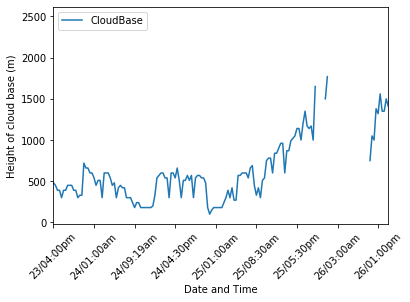

In [41]:
#plt.figure()
apw.plot(x='DateTime',y='CloudBase')
plt.xlabel('Date and Time')         
plt.ylabel('Height of cloud base (m)')
plt.xticks(rotation=45);

To further illustrate the plotting methods, we can plot the air and dewpoint temperatures and the rainfall. Using `axis.twinx()` we can plot fields with different dimensions on the same plot. Note that rainfall generally occurs when the air is saturated, i.e., when the dewpoint temperature approaches the air temperature.

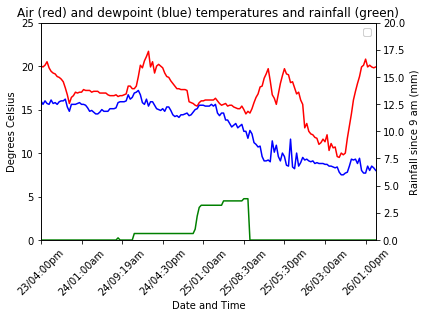

In [42]:
#plt.figure()
ax1 = apw.plot(x='DateTime',y='AirTemperature',color='red') # create reference axes ax1
apw.plot(x='DateTime',y='DewPtTemperature',ax=ax1,color='blue') # plot on the already created axes ax1
plt.ylabel('Degrees Celsius')
plt.ylim(0,25)
plt.xlabel('Date and Time')
plt.xticks(rotation=45)
plt.legend('')

ax2 = ax1.twinx() # create a second set of axes for Rain for which the labels will appear on the left
apw.plot(x='DateTime',y='Rain',ax=ax2,color='green',legend='None')
plt.ylabel('Rainfall since 9 am (mm)')
plt.ylim(0,20)
plt.legend('')
plt.title('Air (red) and dewpoint (blue) temperatures and rainfall (green)');

Finally we can investigate the relationships between our numerical variables. The simplest of these is the correlation. Roughly, if this is close to 1 there is an approximately linearly increasing relationship, if it is close to -1 there is an approximately linearly decreasing relationship and if it is close to 0 there is no linear relationship between the variables. This can be calculated using the `df.corr()` method. We first drop the field `FullDateTime`.

In [44]:
dapw = apw.drop(columns=['FullDateTime'])
dapw.corr()

,CloudBase,WindGust,AirTemperature,DewPtTemperature,Rain,WindSpeed
CloudBase,1.000000,0.158533,-0.167699,-0.835048,-0.323598,0.171250
WindGust,0.158533,1.000000,0.332760,-0.214145,0.085809,0.940103
AirTemperature,-0.167699,0.332760,1.000000,0.420677,-0.110149,0.271866
DewPtTemperature,-0.835048,-0.214145,0.420677,1.000000,0.257440,-0.233120
Rain,-0.323598,0.085809,-0.110149,0.257440,1.000000,0.056552
WindSpeed,0.171250,0.940103,0.271866,-0.233120,0.056552,1.000000


The correlations show that CloudBase and DewPtTemperature are strongly correlated, and WindGust and WindSpeed are strongly correlated. This is to be expected and can be seen in the plots between these variables. The rest are only weakly correlated, for example, if we plot AirTemperature against DewPtTemperature there is clearly no linear relationship between the variables.

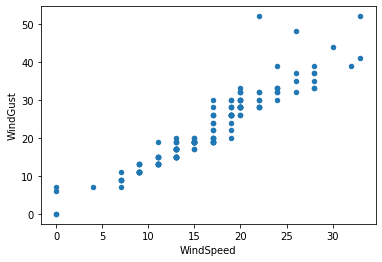

In [45]:
apw.plot.scatter(x='WindSpeed',y='WindGust');

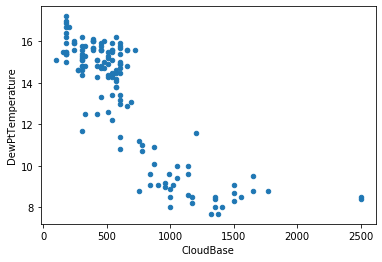

In [46]:
apw.plot.scatter(x='CloudBase',y='DewPtTemperature')

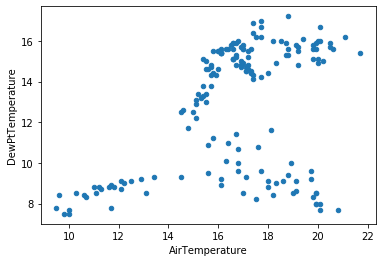

In [47]:
apw.plot.scatter(x='AirTemperature',y='DewPtTemperature');

## Exercises

### Exercise 1

Create a series that contains the first names (as indexes) and heights (in cm, as values) of at least five people you know. If you don't know the exact height, you can estimate. Sort the series by ascending height. Filter the series to show only heights greater than 175 cm.

### Exercise 2

Given the following series that describe the height and average number of "marks" for players on the 2019 Richmond AFL Team, sort the dataframe by ascending height and filter the dataframe to only show heights less than 175cm. Use `df.corr()` to examine the relationship between height and marks on this team. Plot the relationship using `plot.scatter()`.

In [6]:
height = pd.Series([195,173,194,175,192,182,186,181,199,200,185,182,180,181,192,181,193,177,180,178,199,188,187,191,187,182,199,184,175,194,193,179,187,178,204,179,187,187,182], 
                 index=["Astbury, David","Baker, Liam","Balta, Noah","Bolton, Shai","Broad, Nathan","Butler, Dan","Caddy, Josh","Castagna, Jason","Chol, Mabior","Coleman-Jones, Callum","Cotchin, Trent","Edwards, Shane","Eggmolesse-Smith, Derek","Ellis, Brandon","Garthwaite, Ryan","Graham, Jack","Grimes, Dylan","Higgins, Jack","Houli, Bachar","Lambert, Kane","Lynch, Tom J","Markov, Oleg","Martin, Dustin","McIntosh, Kamdyn","Menadue, Connor","Naish, Patrick","Nankervis, Toby","Pickett, Marlion","Prestia, Dion","Rance, Alex","Riewoldt, Jack","Rioli, Daniel","Ross, Jack","Short, Jayden","Soldo, Ivan","Stack, Sydney","Townsend, Jacob","Vlastuin, Nick","Weller, Maverick"])


avg_marks = pd.Series([6.00,3.32,2.31,3.05,3.58,2.00,3.56,4.13,2.44,3.00,2.64,3.29,2.00,5.04,4.00,2.25,5.38,3.00,6.41,4.62,5.04,4.50,4.17,4.00,3.17,4.50,2.33,2.00,3.44,2.00,4.23,2.82,2.43,4.40,2.36,4.88,1.00,6.50,3.00], 
                 index=["Astbury, David","Baker, Liam","Balta, Noah","Bolton, Shai","Broad, Nathan","Butler, Dan","Caddy, Josh","Castagna, Jason","Chol, Mabior","Coleman-Jones, Callum","Cotchin, Trent","Edwards, Shane","Eggmolesse-Smith, Derek","Ellis, Brandon","Garthwaite, Ryan","Graham, Jack","Grimes, Dylan","Higgins, Jack","Houli, Bachar","Lambert, Kane","Lynch, Tom J","Markov, Oleg","Martin, Dustin","McIntosh, Kamdyn","Menadue, Connor","Naish, Patrick","Nankervis, Toby","Pickett, Marlion","Prestia, Dion","Rance, Alex","Riewoldt, Jack","Rioli, Daniel","Ross, Jack","Short, Jayden","Soldo, Ivan","Stack, Sydney","Townsend, Jacob","Vlastuin, Nick","Weller, Maverick"])


### Exercise 3

Use `df.plot.pie()` to plot a pie chart of the states' population and area using the state data provieded above in the notebook. This should be two subplots on the same figure. See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html.

### Exercise 4

Using the weather data, use `df.plot.hist()` to plot a histogram of dewpoint temperature and air temperature. Include both distrubtions on the same plot. See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.hist.html.

### Exercise 5

Using the weather data, calculate the maximum and minimum temperatures for the 25 March. You will need to subset the data and use `df.min()` and `df.max()`.